In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ab = pd.read_csv('Absenteeism_at_work_train.csv', thousands = ',')
ab.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,272636.885886,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,42957.873835,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,0.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,244387.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [3]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason for absence               666 non-null    int64  
 2   Month of absence                 666 non-null    int64  
 3   Day of the week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation expense           666 non-null    int64  
 6   Distance from Residence to Work  666 non-null    int64  
 7   Service time                     666 non-null    int64  
 8   Age                              666 non-null    object 
 9   Work load Average/day            666 non-null    int64  
 10  Hit target                       665 non-null    float64
 11  Disciplinary failure             666 non-null    int64  
 12  Education             

In [4]:
# removing any non numeric values in 'Age' column as it wasn't present in describe or info
ab['Age'] = ab['Age'].str.replace(r'[^\d.]','')

# converting age to numeric
ab['Age'] = pd.to_numeric(ab['Age'])

ab.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,...,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,36.351880,272636.885886,...,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,6.515928,42957.873835,...,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
# missing values
ab.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                1
Work load Average/day              0
Hit target                         1
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             2
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [6]:
# drop missing values, as there are very few rows
ab = ab.dropna()

# drop rows where age = 0
ab = ab[ab['Age'] > 0]
ab.shape

(661, 21)

In [7]:
# check for missing values again
ab.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [8]:
# check all values again
ab.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,...,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,17.644478,19.478064,6.450832,3.889561,2.553707,222.612708,30.298033,12.680787,36.409985,272523.078669,...,0.054463,1.245083,1.031770,0.586989,0.068079,0.683812,79.232980,171.874433,26.819970,6.757943
std,11.078060,8.358531,3.570853,1.425386,1.135744,66.739962,14.904763,4.313763,6.348215,43027.455882,...,0.227101,0.615822,1.127032,0.492748,0.252072,1.169639,12.638812,5.950882,4.217492,12.712871
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,27.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


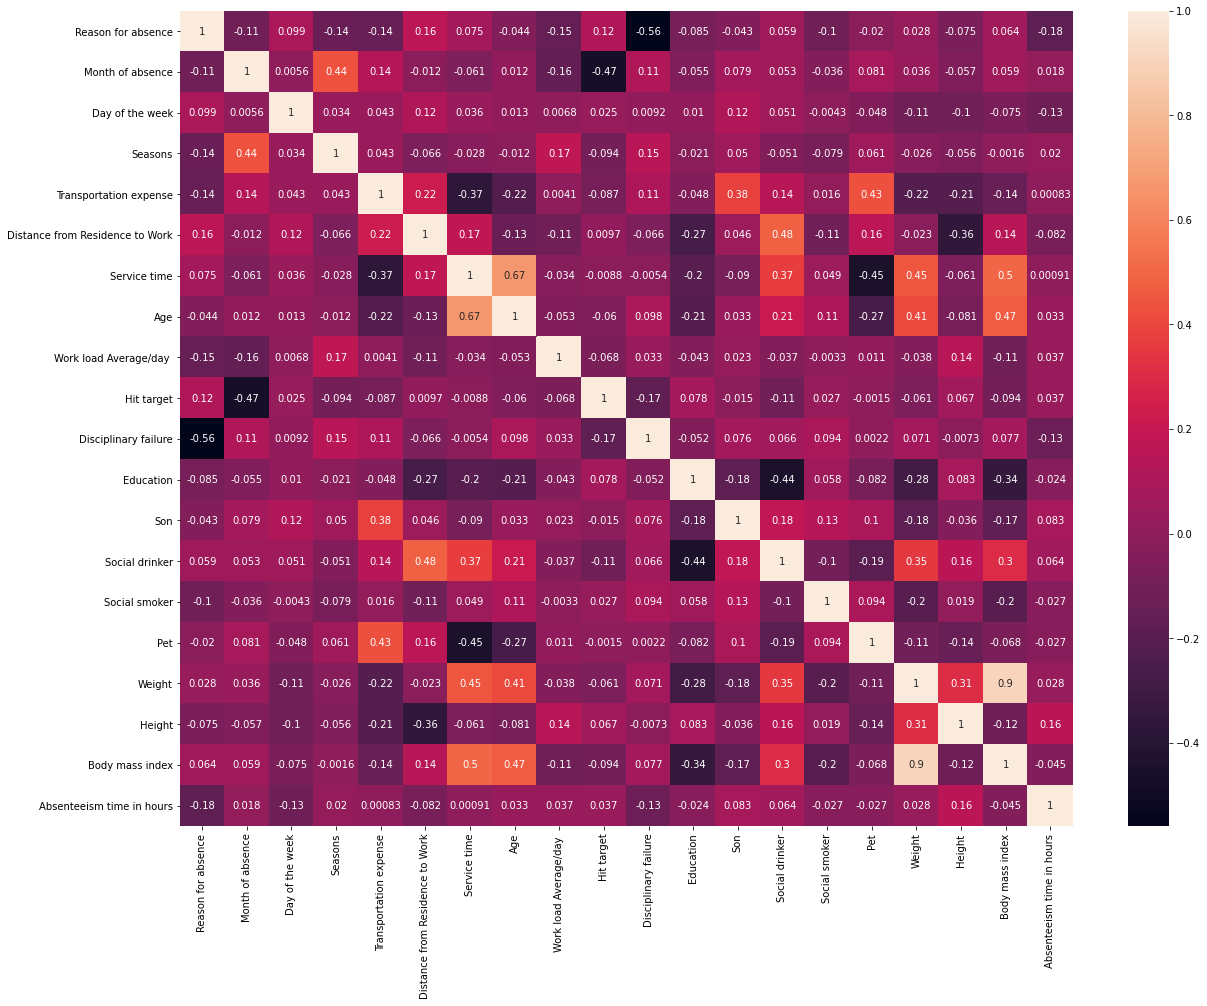

In [9]:
# doing a heat map for feature selection
plt.figure(figsize = (20,15))
heat = sns.heatmap(ab.drop(['ID'], axis=1).corr(), annot = True)

In [10]:
# categorizing continous values of target variable.
ab['how late'] = ['on-time' if i==0 else 'late' if 0<i<=10 else 'bad' if 10<i<=24 else 'worse' if i>24 else None \
                 for i in list(ab['Absenteeism time in hours'].values)]

In [11]:
ab.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,...,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,17.644478,19.478064,6.450832,3.889561,2.553707,222.612708,30.298033,12.680787,36.409985,272523.078669,...,0.054463,1.245083,1.031770,0.586989,0.068079,0.683812,79.232980,171.874433,26.819970,6.757943
std,11.078060,8.358531,3.570853,1.425386,1.135744,66.739962,14.904763,4.313763,6.348215,43027.455882,...,0.227101,0.615822,1.127032,0.492748,0.252072,1.169639,12.638812,5.950882,4.217492,12.712871
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,27.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [12]:
# preparing dataset for training and testing
X = ab[['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Education', 'Son', 'Social drinker', 'Pet', 'Body mass index']]
y = ab['how late']

# doing 80-20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [13]:
# SVM/SVC model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [14]:
pred = svc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         8
        late       0.85      1.00      0.92       113
     on-time       0.00      0.00      0.00         9
       worse       0.00      0.00      0.00         3

    accuracy                           0.85       133
   macro avg       0.21      0.25      0.23       133
weighted avg       0.72      0.85      0.78       133



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(confusion_matrix(y_test,pred))

[[  0   8   0   0]
 [  0 113   0   0]
 [  0   9   0   0]
 [  0   3   0   0]]


In [17]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,pred))

Accuracy:  0.849624060150376


In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [19]:
pred_log = log.predict(X_test)

In [20]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         8
        late       0.91      0.96      0.93       113
     on-time       0.64      1.00      0.78         9
       worse       0.00      0.00      0.00         3

    accuracy                           0.88       133
   macro avg       0.39      0.49      0.43       133
weighted avg       0.81      0.88      0.84       133



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print(confusion_matrix(y_test,pred_log))

[[  0   8   0   0]
 [  0 108   5   0]
 [  0   0   9   0]
 [  0   3   0   0]]


In [22]:
print("Accuracy: ", metrics.accuracy_score(y_test,pred_log))

Accuracy:  0.8796992481203008
